In [1]:
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
(xtrain,_),(_,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain = xtrain.reshape((*xtrain.shape,1))

In [4]:
print(xtrain.shape)

(60000, 28, 28, 1)


## **Normalize the data**

In [5]:
xtrain = (xtrain.astype('float32')-127.5)/127.5

In [6]:
total_epoch = 50
batch_size = 256
no_of_batches = int(xtrain.shape[0]/batch_size)
half_batch = 128
noise_dim = 100
adam = Adam(lr=2e-4,beta_1=0.5)

In [9]:
### lets define our generator 
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(noise_dim,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

## Double the activation size

generator.add(Conv2DTranspose(64,kernel_size=(5,5),strides=(2,2),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())



generator.add(Conv2DTranspose(1,kernel_size=(5,5),padding='same',strides=(2,2),activation='tanh'))


generator.compile(loss='binary_crossentropy',optimizer ='adam')
generator.summary()

## lets define our discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),padding='same',strides=(2,2),input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Conv2D(128,(5,5),padding='same',strides=(2,2)))

## Flatten
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.summary()





Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)       

In [10]:
## implementating GAN
discriminator.trainable =False
gan_input = Input(shape=(noise_dim,))
gen_img = generator(gan_input)
gan_output = discriminator(gen_img)

### using functional api
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [11]:
xtrain.shape

(60000, 28, 28, 1)

In [12]:
import os
os.mkdir('images')
os.mkdir('models')

## **Let's Train Our Model**

In [13]:
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,noise_dim))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Epoch 1 Disc Loss 0.1823 Generator Loss 0.2004
Epoch 2 Disc Loss 0.4004 Generator Loss 2.7768
Epoch 3 Disc Loss 0.6170 Generator Loss 1.7231
Epoch 4 Disc Loss 0.5067 Generator Loss 1.7923
Epoch 5 Disc Loss 0.3896 Generator Loss 2.3925


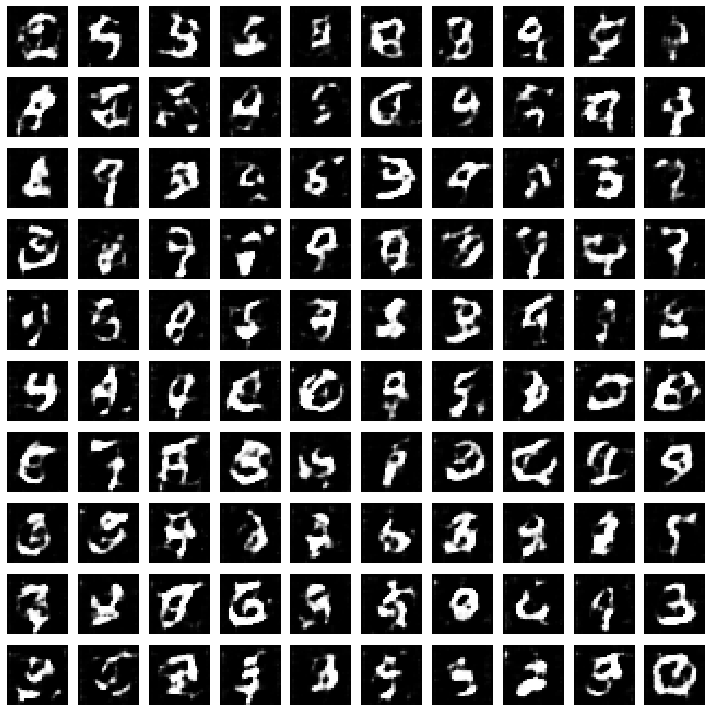

Epoch 6 Disc Loss 0.4193 Generator Loss 2.3860
Epoch 7 Disc Loss 0.4635 Generator Loss 2.2156
Epoch 8 Disc Loss 0.4781 Generator Loss 2.0891
Epoch 9 Disc Loss 0.5129 Generator Loss 2.0108
Epoch 10 Disc Loss 0.5448 Generator Loss 1.8012


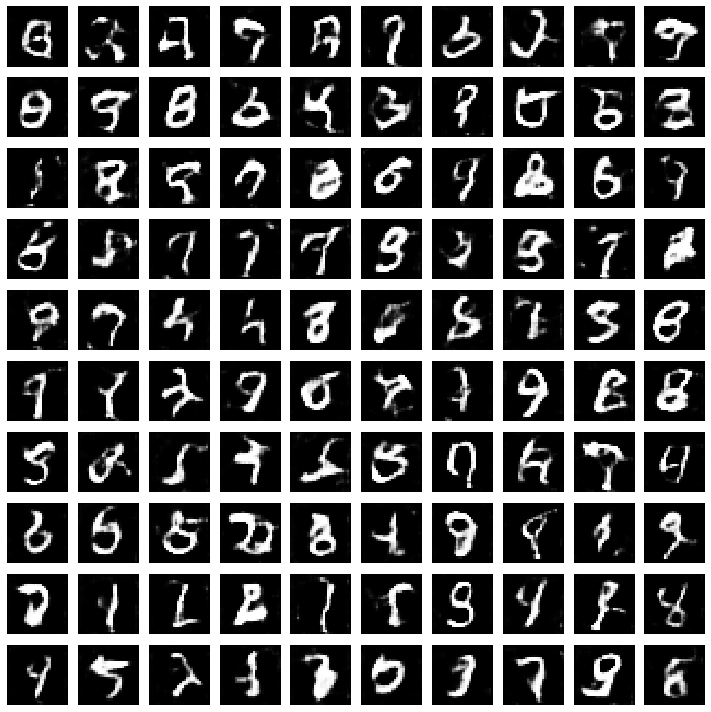

Epoch 11 Disc Loss 0.5511 Generator Loss 1.7076
Epoch 12 Disc Loss 0.5490 Generator Loss 1.6601
Epoch 13 Disc Loss 0.5574 Generator Loss 1.6795
Epoch 14 Disc Loss 0.5585 Generator Loss 1.6216
Epoch 15 Disc Loss 0.5608 Generator Loss 1.6055


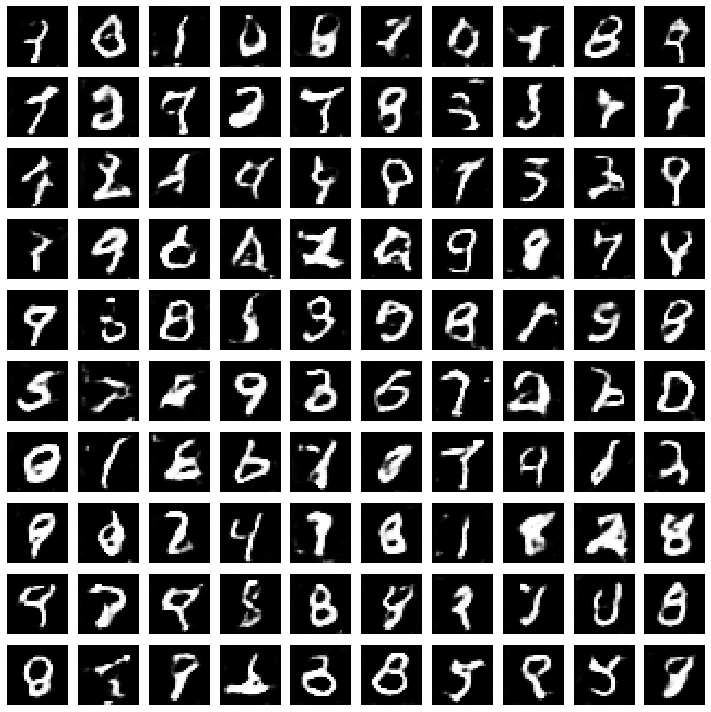

Epoch 16 Disc Loss 0.5697 Generator Loss 1.6045
Epoch 17 Disc Loss 0.5693 Generator Loss 1.5570
Epoch 18 Disc Loss 0.5705 Generator Loss 1.6012
Epoch 19 Disc Loss 0.5667 Generator Loss 1.5548
Epoch 20 Disc Loss 0.5778 Generator Loss 1.5377


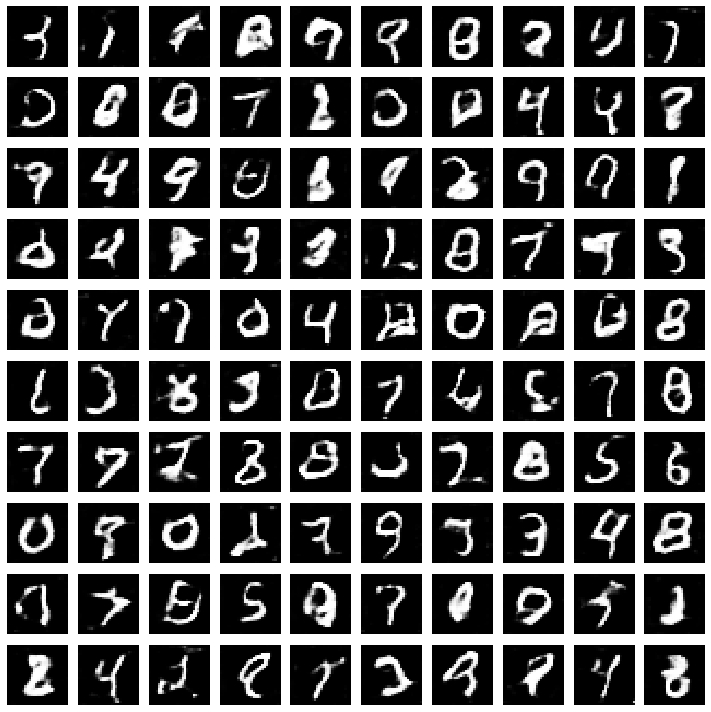

Epoch 21 Disc Loss 0.5703 Generator Loss 1.5606
Epoch 22 Disc Loss 0.5789 Generator Loss 1.5503
Epoch 23 Disc Loss 0.5728 Generator Loss 1.5197
Epoch 24 Disc Loss 0.5650 Generator Loss 1.5470
Epoch 25 Disc Loss 0.5784 Generator Loss 1.5488


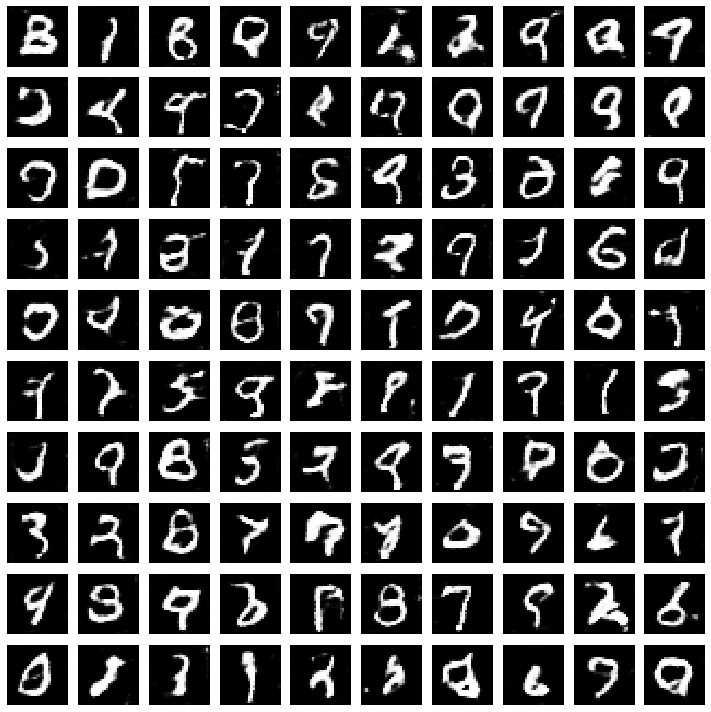

Epoch 26 Disc Loss 0.5823 Generator Loss 1.4820
Epoch 27 Disc Loss 0.5832 Generator Loss 1.4768
Epoch 28 Disc Loss 0.5804 Generator Loss 1.4835
Epoch 29 Disc Loss 0.5782 Generator Loss 1.4813
Epoch 30 Disc Loss 0.5747 Generator Loss 1.5028


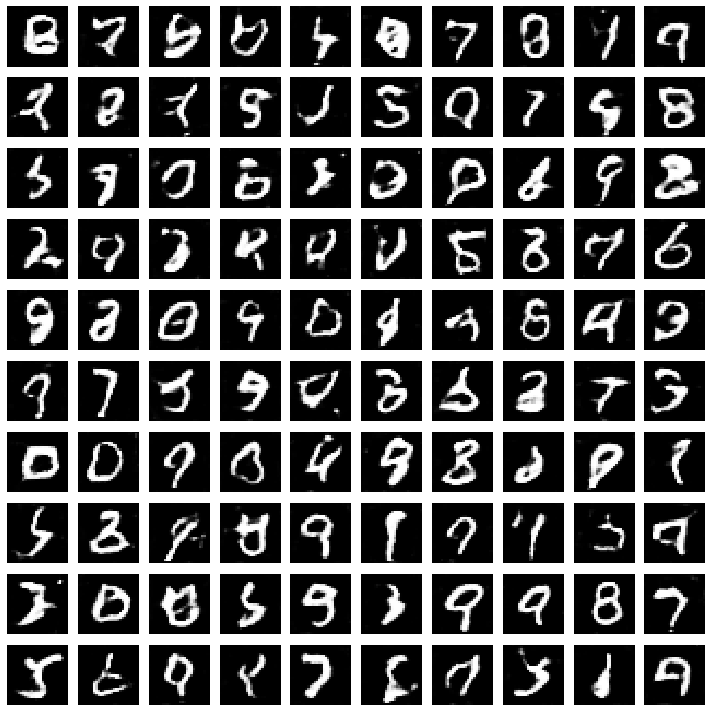

Epoch 31 Disc Loss 0.5977 Generator Loss 1.4604
Epoch 32 Disc Loss 0.5751 Generator Loss 1.4769
Epoch 33 Disc Loss 0.5867 Generator Loss 1.4711
Epoch 34 Disc Loss 0.5819 Generator Loss 1.4821
Epoch 35 Disc Loss 0.5800 Generator Loss 1.4990


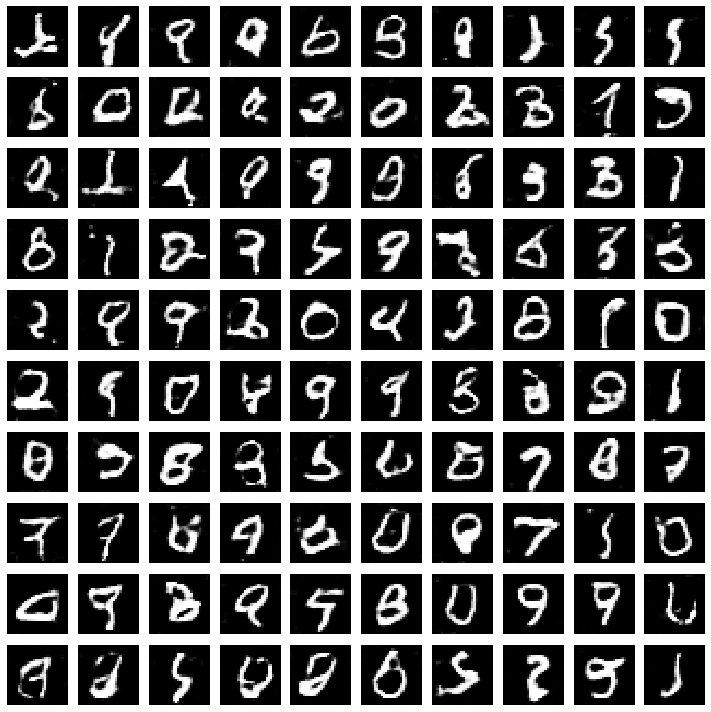

Epoch 36 Disc Loss 0.5946 Generator Loss 1.4495
Epoch 37 Disc Loss 0.5814 Generator Loss 1.4784
Epoch 38 Disc Loss 0.5967 Generator Loss 1.4303
Epoch 39 Disc Loss 0.5821 Generator Loss 1.4436
Epoch 40 Disc Loss 0.5774 Generator Loss 1.4833


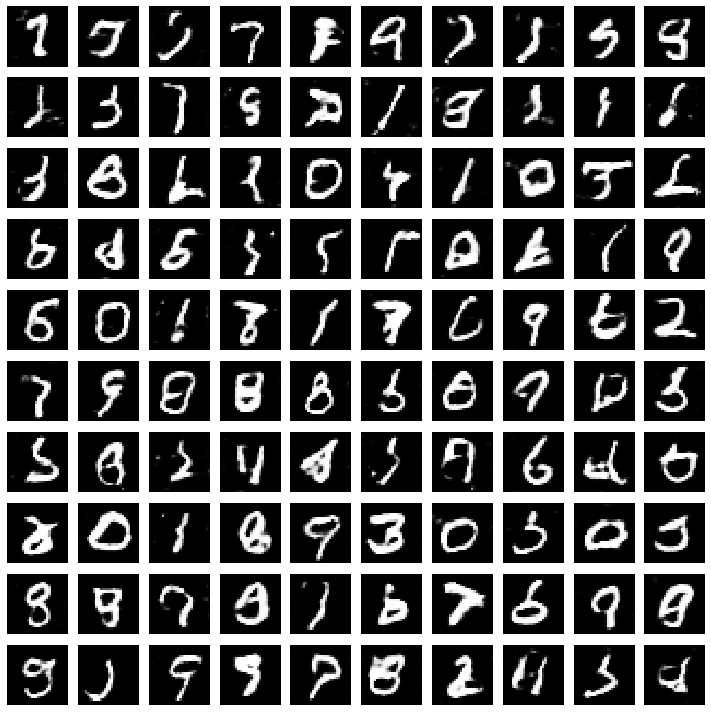

Epoch 41 Disc Loss 0.5813 Generator Loss 1.4752
Epoch 42 Disc Loss 0.5713 Generator Loss 1.5081
Epoch 43 Disc Loss 0.5862 Generator Loss 1.4898
Epoch 44 Disc Loss 0.5885 Generator Loss 1.4598
Epoch 45 Disc Loss 0.5900 Generator Loss 1.4351


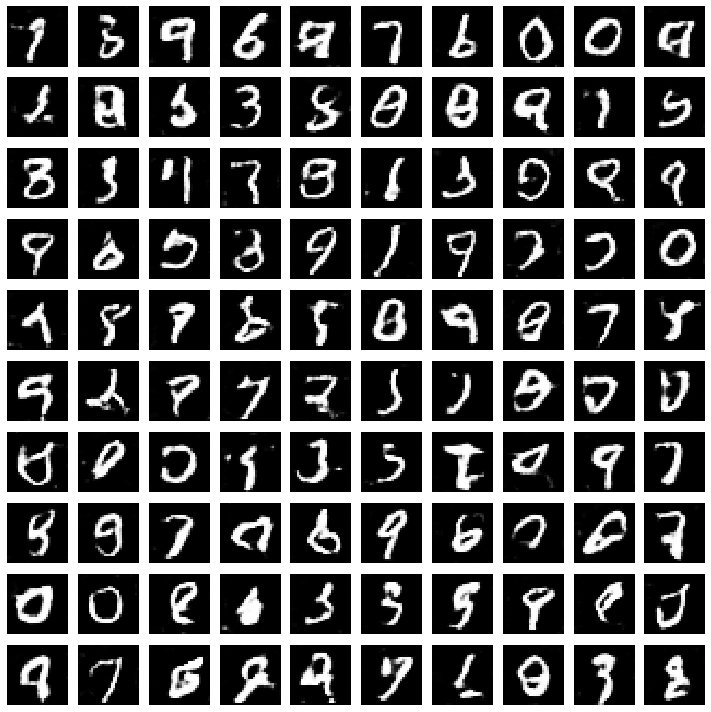

Epoch 46 Disc Loss 0.5723 Generator Loss 1.4888
Epoch 47 Disc Loss 0.5890 Generator Loss 1.5115
Epoch 48 Disc Loss 0.5762 Generator Loss 1.4744
Epoch 49 Disc Loss 0.5777 Generator Loss 1.5110
Epoch 50 Disc Loss 0.5799 Generator Loss 1.5089


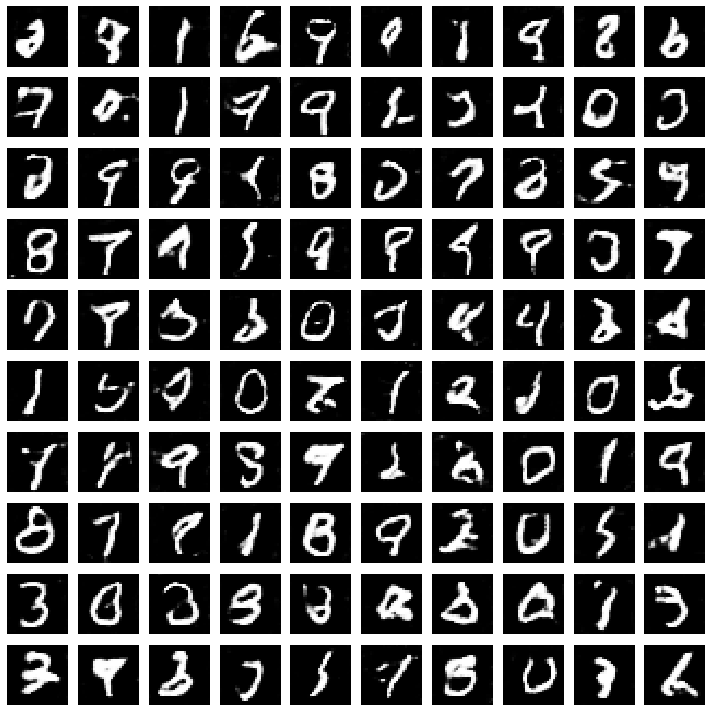

In [14]:
### training two step process

d_losses = []
g_losses = []


for epoch in range(total_epoch):
  epoch_d_loss = 0.
  epoch_g_loss = 0.
  ### mini batch SGD
  for step in range(no_of_batches):
    ## train the discriminator
    ## 50% real data
    idx = np.random.randint(0,xtrain.shape[0],half_batch)
    real_img = xtrain[idx]

    ## 50% fake data
    noise = np.random.normal(0,1,size=(half_batch,noise_dim))
    fake_img = generator.predict(noise)


    ## labels
    real_y = np.ones((half_batch,1))*0.9 # real otput
    fake_y = np.zeros((half_batch,1))

    ## train our discriminator
    real_loss = discriminator.train_on_batch(real_img,real_y)
    fake_loss = discriminator.train_on_batch(fake_img,fake_y)
    d_loss = 0.5*real_loss+0.5*fake_loss
    #print("d_loss {}".format(d_loss))
    epoch_d_loss += d_loss

    ## train our generator
    noise = np.random.normal(0,1,size=(half_batch,noise_dim))
    ground_truth = np.ones((half_batch,1))

    g_loss = model.train_on_batch(noise,ground_truth)
    #print("g_loss {}".format(g_loss))
    epoch_g_loss += g_loss
  print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/no_of_batches,epoch_g_loss/no_of_batches))
  d_losses.append(epoch_d_loss/no_of_batches)
  g_losses.append(epoch_g_loss/no_of_batches)

  if (epoch+1)%5==0:
    generator.save('models/gan_generator_{0}.h5'.format(epoch+1))
    save_imgs(epoch)

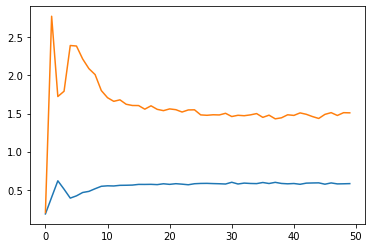

In [15]:
plt.plot(np.array(d_losses))
plt.plot(np.array(g_losses))
plt.show()